# Dimensionality Reduction Sprint Challenge

A powerful method for dimensionality reduction is using Principal Components Analysis (PCA).

Students should be able to complete objectives after this sprint:
* Identify the use case for normalization
* Graph the top two dimensions of a high dimensional dataset with PCA
* Compute the eigenvectors and eigenvalues of a dataset

Lets use the UCI Wine Dataset for this Sprint  Challenge: It is high dimensional, numeric, and clean - an excellent opportunity for PCA.

[UCI Wine Data Set](http://archive.ics.uci.edu/ml/datasets/Wine)

The UCI License forbids redistributing their data. We can link directly to it!

[UCI Wine Data Set Data](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [0]:
# Download the data to your colab instance!
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -O wine.data

--2018-04-20 16:47:37--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2018-04-20 16:47:37 (83.6 MB/s) - ‘wine.data’ saved [10782/10782]



In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('wine.data')

# Column names from:
# http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
columns = ['vinyard','alcohol','malic acid','ash','ash alcalinity','magnesium',
           'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
           'Color intensity','Hue','dilute OD280/OD315', 'Proline']

data.columns = columns

vinyard = data['vinyard']
data = data.drop(['vinyard'],axis=1)
colors = np.array(['red','green','blue'])[np.array([vinyard])-1]

print(data.head())
print("=" * 60)
# print(colors.shape)
# print("=" * 60)
# print(colors)
# print("=" * 60)
# print(vinyard.head())
# print((np.array([vinyard])-1).shape)


   alcohol  malic acid   ash  ash alcalinity  magnesium  Total phenols  \
0    13.20        1.78  2.14            11.2        100           2.65   
1    13.16        2.36  2.67            18.6        101           2.80   
2    14.37        1.95  2.50            16.8        113           3.85   
3    13.24        2.59  2.87            21.0        118           2.80   
4    14.20        1.76  2.45            15.2        112           3.27   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
2        3.49                  0.24             2.18             7.80  0.86   
3        2.69                  0.39             1.82             4.32  1.04   
4        3.39                  0.34             1.97             6.75  1.05   

   dilute OD280/OD315  Proline  
0                3.40     1050  
1             

# 1. Identify the use case for normalization

Principal Components Analysis will give us a view into our data that maximizes its variance, potentially improving intuition and learning algorithms. Look at the below `data.std()` output. If we use PCA to project the wine dataset onto the 3 dimensions with the highest variance, which ones will they be? How will this projection differ than simply plotting the three dimensions directly?

In [0]:
print(data.std())
print("=" * 40)
print("\n")
print("=" * 40)
# print(data.mean())
# print("=" * 40)
print("3 dimensions with highest variance: Proline, magnesium, ash alcalinity")
print("=" * 40)

alcohol                   0.808808
malic acid                1.119314
ash                       0.275080
ash alcalinity            3.336071
magnesium                14.174018
Total phenols             0.626465
Flavanoids                0.998658
Nonflavanoid phenols      0.124653
Proanthocyanins           0.571545
Color intensity           2.324446
Hue                       0.229135
dilute OD280/OD315        0.705103
Proline                 314.884046
dtype: float64


3 dimensions with highest variance: Proline, magnesium, ash alcalinity


# 2. Graph the top two dimensions of a high dimensional dataset using PCA

Use PCA with 2 components to plot the top two dimensions of this dataset. Apply the color vector above so that the origin of each sample is visible.

(177, 2)


Text(0,0.5,'Second Principal Component')

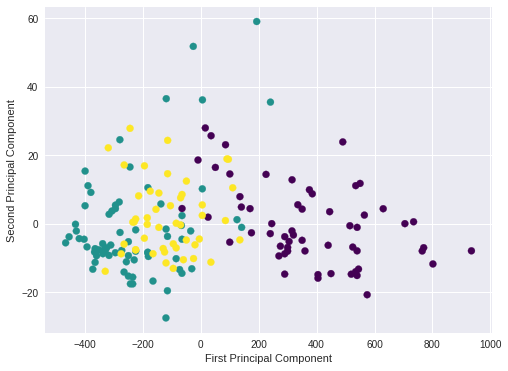

In [0]:
# Use PCA and make a graph of data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA


# scaler = StandardScaler()
# scaler.fit(data)
# scaled_data = scaler.transform(data)

pca = PCA(n_components = 2)
pca.fit(data)
x_pca = pca.transform(data)
# print(scaled_data.shape)
print(x_pca.shape)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=vinyard, cmap='viridis')
# plt.scatter(x_pca[:,0], x_pca[:,1], c=colors)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# 3. Graph the top two dimensions of a normalized high dimensional dataset using PCA

Use a `normalization` from `scikit.preprocessing` to improve the results of the PCA.

(177, 13)
(177, 2)


Text(0,0.5,'Second Principal Component')

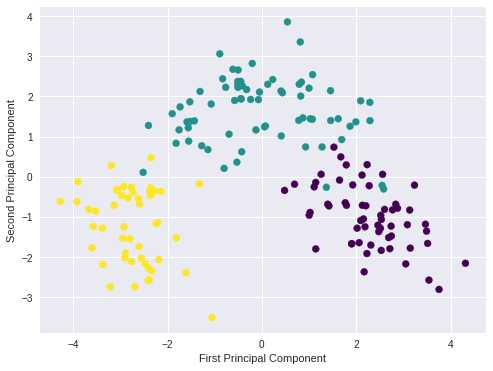

In [0]:
# Use normalization, and PCA, to make a graph of the data

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

pca_scaled = PCA(n_components = 2)
pca_scaled.fit(scaled_data)
x_pca_scaled = pca_scaled.transform(scaled_data)
print(scaled_data.shape)
print(x_pca_scaled.shape)

plt.figure(figsize=(8,6))
plt.scatter(x_pca_scaled[:,0], x_pca_scaled[:,1], c=vinyard, cmap='viridis')
# plt.scatter(x_pca[:,0], x_pca[:,1], c=colors)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


# 4. Compute the eigenvectors of a dataset

What are the top-two eigenvectors of the above un-normalized dataset?

In [0]:
# evec = the top two eigenvectors of the UCI Wine dataset, un-normalized
import scipy.sparse as sparse

evec = pca.components_
print(evec)
# print(sparse.linalg.eigs(pca))

# print(pca.components_)
# print(pca.explained_variance_ratio_)

[[ 1.64640308e-03 -6.73503229e-04  1.94877262e-04 -4.62714440e-03
   1.74715429e-02  9.86349949e-04  1.55753482e-03 -1.22303077e-04
   5.91285826e-04  2.33005971e-03  1.70867398e-04  6.85045272e-04
   9.99830206e-01]
 [ 7.16631916e-04  2.50017789e-03  4.67090151e-03  2.87250643e-02
   9.99280105e-01  7.48473242e-04 -4.49114755e-04 -1.34284344e-03
   4.71110804e-03  1.54838007e-02 -7.97923308e-04 -4.34277343e-03
  -1.73653604e-02]]


# 5. Compute the eigenvalues of a dataset

What are the top-two eigenvalues of the above un-normalized dataset?

In [0]:
# eval = the top two eigenvalues of the UCI Wine dataset, un-normalized

eval = pca.explained_variance_ratio_
print(eval)

[0.99810743 0.00171939]
